<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:skyblue;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h2 style='padding: 20px;
              color:black;
              text-align:center;'>
        FLIGHT FARE PREDICTION
    </h2>
    </div>

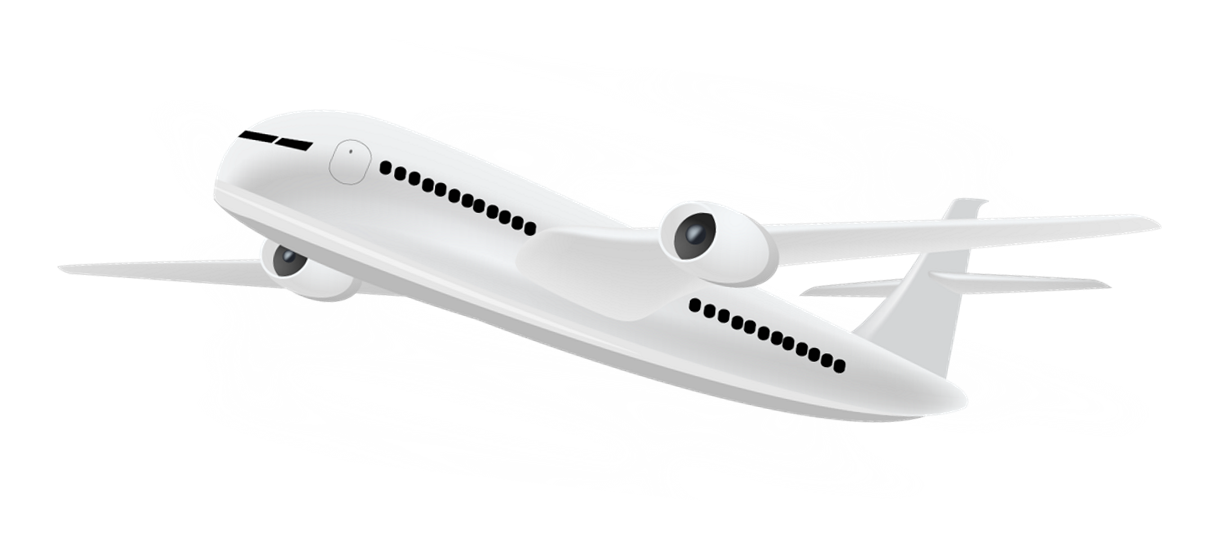

**An airline company provides air transport services for traveling passengers.
Airlines assign prices to their services in an attempt to maximize profitability. The pricing of airline tickets has become increasingly complicated over the years.**

**The price of an Airline Ticket is affected by a number of factors, such as flight duration, days left for departure, arrival time and departure time, arrival cities etc.
The goal is to build a model that accurately predicts flight prices to help travelers save time and money.**


## About Dataset

We have 2 datasets here — training set and test set.

The training set contains the features, along with the prices of the flights. It contains 10683 records, 10 input features and 1 output column — ‘Price’.

The test set contains 2671 records and 10 input features. The output ‘Price’ column needs to be predicted in this set. 

We will use Regression techniques here, since the predicted output will be a continuous value.


### Features Information

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

# Necessary Steps followed for Model Building

### Step1:-  Importing Necessary Libraries

In [1]:
# Basic Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Algorithm used to build ML Model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [3]:
# Model Evaluation 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score

### Step 2. Loading the Dataset

In [4]:
train_data = pd.read_excel("Data_Train.xlsx")

In [5]:
# Checking for top 5 records

train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
# Extracting the information from the dataset

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


We can see there is a missing values in Route and Total_Stops we should treat the missing values accordingly

### Now will load test data

In [7]:
test_data = pd.read_excel("Test_set.xlsx")
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


### 3. EDA [Exploratory Data Analysis]

### 1.Train Datset

#### 1. Checking null values

In [9]:
#Check for null values in the dataset
null_counts = train_data.isnull().sum()
null_counts[null_counts>0]

Route          1
Total_Stops    1
dtype: int64

The route and target column has 1 row where there are missing values. Checking which row it is.

In [10]:
train_data[(train_data['Total_Stops'].isnull()) | (train_data['Total_Stops'].isnull())]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In the same row we have both the missing values. Will fill this missing value once feature engineering is completed.

#### 2. Checking for Duplicates

In [11]:
# Select duplicate rows except first occurrence based on all columns
duplicateRows = train_data[train_data.duplicated()]
print("Total Duplicate Rows except first occurrence based on all columns are :",duplicateRows.shape)

Total Duplicate Rows except first occurrence based on all columns are : (220, 11)


In [12]:
#remove duplicate rows in training dataset, by keeping first occurence
train_data.drop_duplicates(keep='first',inplace=True)

In [13]:
train_data.shape

(10463, 11)

we can see after removing duplicated data the shape of the data is reduced from 10683 to 10463

#### 3. Feature Engineering

###### 1. Date_of_Journey column

Since the Date_of_Journey column contains Object datatype we need to convert them to timestamp inorder to use them in our analysis.

In [14]:
# Will check for datatype
train_data.Date_of_Journey.dtype

dtype('O')

In [15]:
# Will check 1 record to know how the data looks like
train_data.Date_of_Journey[0]

'24/03/2019'

#### Now we can extract only date from the Date_of_Journey

In [16]:
train_data["Date"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day

#### Now we can extract only Month from the Date_of_Journey

In [17]:
train_data["Month"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

#### Now we can extract only Year from the Date_of_Journey

In [18]:
train_data["Year"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.year

In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10463 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10463 non-null  object
 1   Date_of_Journey  10463 non-null  object
 2   Source           10463 non-null  object
 3   Destination      10463 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10463 non-null  object
 6   Arrival_Time     10463 non-null  object
 7   Duration         10463 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10463 non-null  object
 10  Price            10463 non-null  int64 
 11  Date             10463 non-null  int32 
 12  Month            10463 non-null  int32 
 13  Year             10463 non-null  int32 
dtypes: int32(3), int64(1), object(10)
memory usage: 1.3+ MB


In [20]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


As we have extracted Date, Month and Year from Date_of_Journey column, So no need to keep Date_of_Journey column we can drop it

In [21]:
train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

#### 2. Departure Time

Similar to Date_of_Journey we can extract values of hour and minute from Dep_Time

In [22]:
train_data["Dep_Time"].dtype

dtype('O')

In [23]:
train_data["Dep_Time"][0]

'22:20'

#### Now we can extract only Horus from the Dep_Time

In [24]:
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

#### Now we can extract only Minutes from the Dep_Time

In [25]:
train_data["Dep_minutes"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

As we have extracted Horus and Minutes from Dep_Time column, So no need to keep Dep_Time column we can drop it

In [26]:
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [27]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


#### 3. Arrival Time

Similar to departure time, we can extract values from arrival time

In [28]:
# Extracting Hours from Arrival Time
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour

# Extracting Minutes from Arrival Time
train_data["Arrival_minutes"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

# Droping Arrival_Time as it is of no use
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [29]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


#### 4.Duration

Time taken by plane to reach destination is called Duration

It is the differnce betwwen Departure Time and Arrival time

In [30]:
train_data['Duration']

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10463, dtype: object

We can see in the above data for some instances we don't have any hrs information and for some instances there is no min info so we want to treate them accordingly

In [31]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time

# Assigning and converting Duration column into list
duration = list(train_data['Duration'])


for i in range(len(duration)):
    if len(duration[i].split()) !=2:  # Checking if the duration contains only hours or mins
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m'  # if it is in hr then i am adding 0mins
        else:
            duration[i] = '0h ' + duration[i]          # if it is not in hr then i am adding 0h before min
            
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0]))    # Extracting hours from duration
    duration_mins.append(int(duration[i].split(sep = 'm')[0].split()[-1]))       # Extractig only minutes from the duration

In [32]:
# Adding duration_hours and duration_mins list to train_data dataframe

train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [33]:
# Now we can drop the duration column because it is no more useful
train_data.drop(['Duration'],axis = 1, inplace=True)

In [34]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


### 4. Handling Categorical Data and Categorical Data Visualizations

1. **Nominal Data** ---> Data are not in any order  ---> OneHotEncoder will be used in this case
2. **Ordinal Data** ---> Data are in order  ---> LabelEncoder is used in this case

In [35]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


In [36]:
train_data.Route

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10463, dtype: object

### Now will try to extract most busiest routes

In [37]:
# Most Busiest routes

busy_routes = train_data.Route.value_counts().reset_index().set_index('Route')
busy_routes = busy_routes.head()
busy_routes

,count
Route,
DEL → BOM → COK,2376
BLR → DEL,1536
CCU → BOM → BLR,979
CCU → BLR,724
BOM → HYD,621


In [38]:
busy_routes['count'].values

array([2376, 1536,  979,  724,  621], dtype=int64)

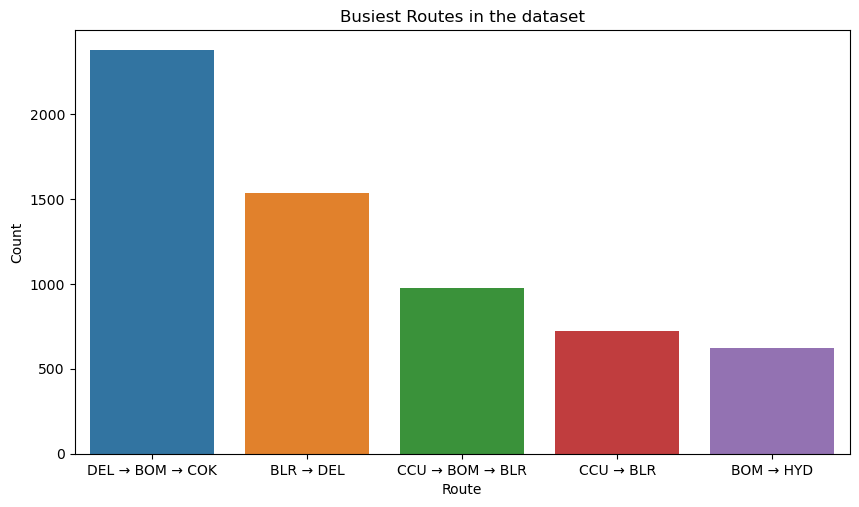

In [39]:
# Let me plot this in pictorical format

plt.figure(figsize=(10,5.5))
sns.barplot(x=busy_routes.index,y=busy_routes['count'].values)
plt.title('Busiest Routes in the dataset')
plt.ylabel('Count')
plt.show()

Delhi to Cochin via Mumbai is the Busiest route with 2376 flights, Followed by Bangalore to Delhi.

In [40]:
train_data.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25


In [41]:
train_data_copy = train_data.copy(deep=True)

In [42]:
# Route and Total_Stops are related to each other so we are dropping route
#Since the ‘Total_Stops’ variable captures the information if the flight is direct or connected so we can drop Routes variable.
train_data.drop(["Route"], axis = 1, inplace = True)

In [43]:
# Checking categorical variables
df_categorical_features = train_data.select_dtypes(include='object')
df_categorical_features.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info'], dtype='object')

In [44]:
train_data.select_dtypes(include = 'object')

,Airline,Source,Destination,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,non-stop,No info
1,Air India,Kolkata,Banglore,2 stops,No info
2,Jet Airways,Delhi,Cochin,2 stops,No info
3,IndiGo,Kolkata,Banglore,1 stop,No info
4,IndiGo,Banglore,New Delhi,1 stop,No info
...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,No info
10679,Air India,Kolkata,Banglore,non-stop,No info
10680,Jet Airways,Banglore,Delhi,non-stop,No info
10681,Vistara,Banglore,New Delhi,non-stop,No info


### Now will perform countplot for all the categorical features

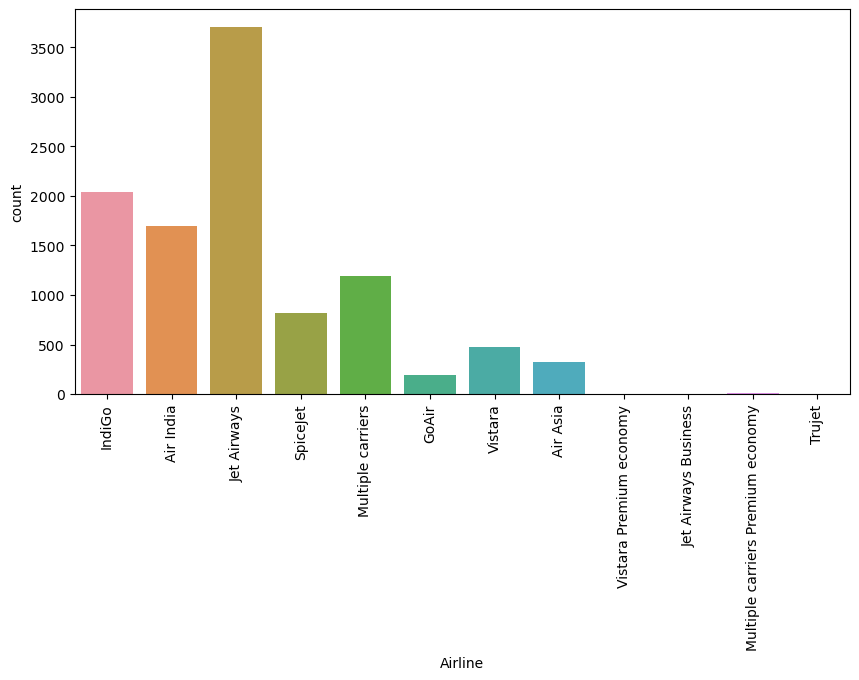

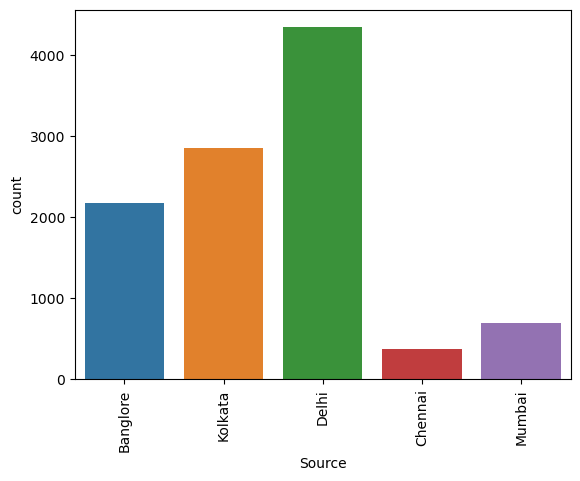

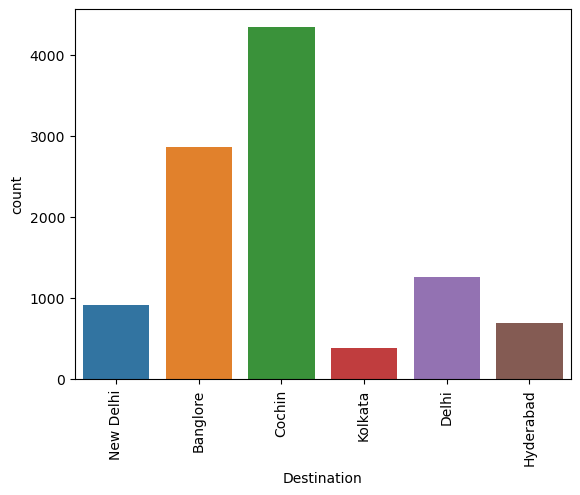

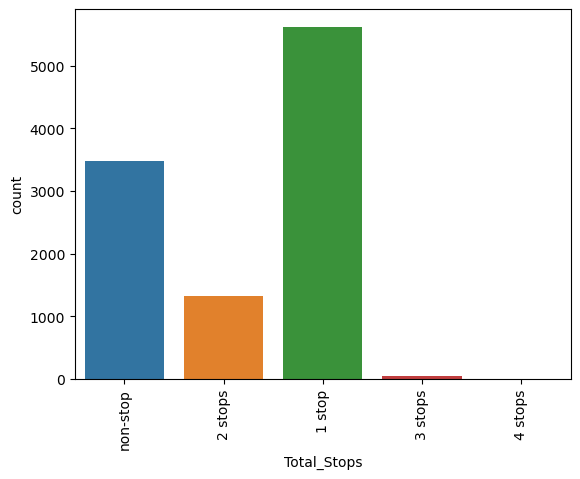

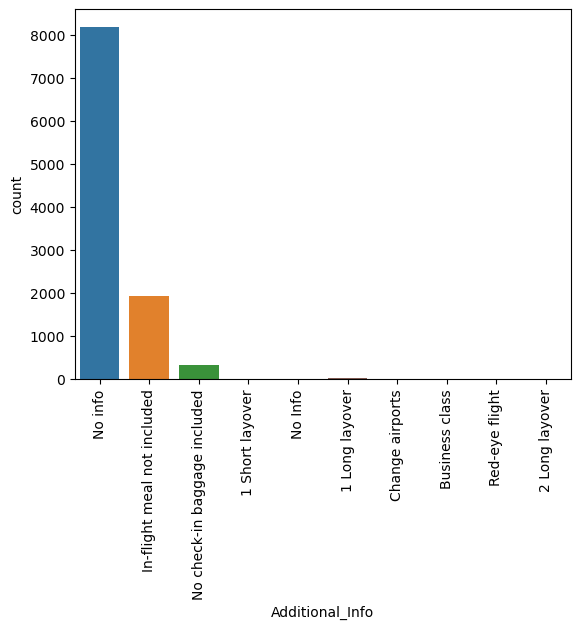

In [45]:
plt.figure(figsize=(10,5))
for i in df_categorical_features.columns:
    sns.countplot(data = train_data, x = i)
    plt.xticks(rotation = 90)
    plt.show()

will try to find the insights from the above plots

**Airline**

1. Jet Airways is the most preferred airline with the highest records, which are followed by Indigo and Air India airline.
2. Count for Vistara Premium economy, Trujet, Multiple carries premium economy and Jet airways business is quite low.

**Source**

1. Majority of the flights take off from Delhi
2. Chennai has the minimum number of flight take-offs

**Destination**

1. Maximum flights land in Cochin
2. Kolkata has the lowest count of receiving the flights

**Total Stops**

Majority of the flights have stops as 1, flights with 3 and 4 stops are quite low

**Additional Info**

Maximum rows have No info as the value.

#### We will now compare the independent features with ‘Price’ column, to check the impact on ‘Price’.

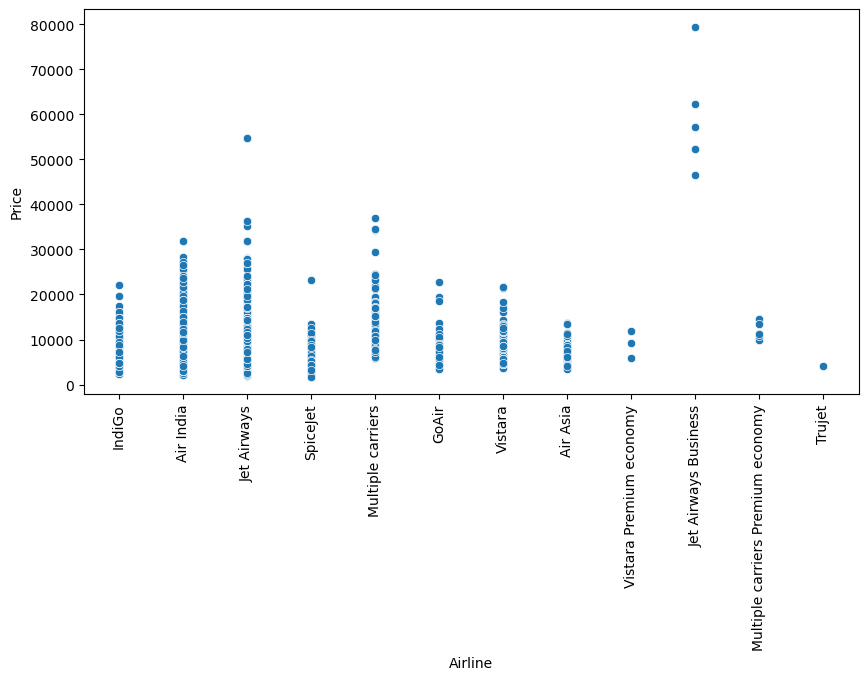

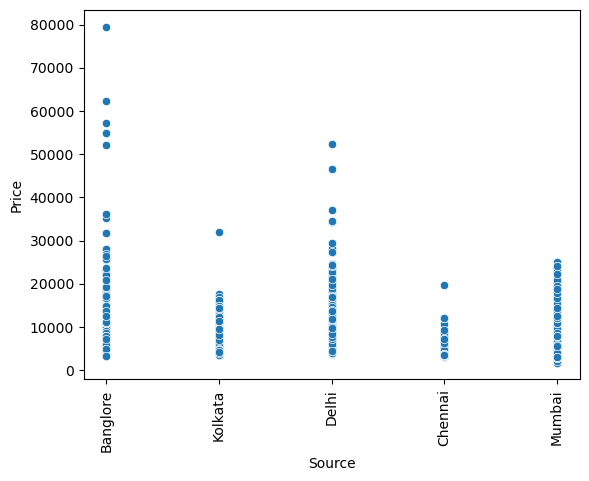

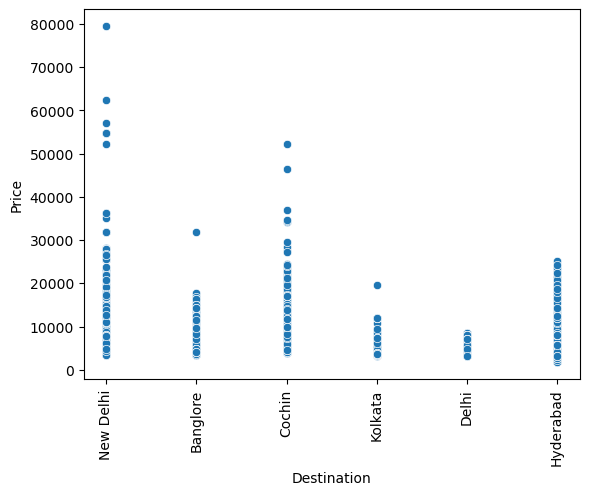

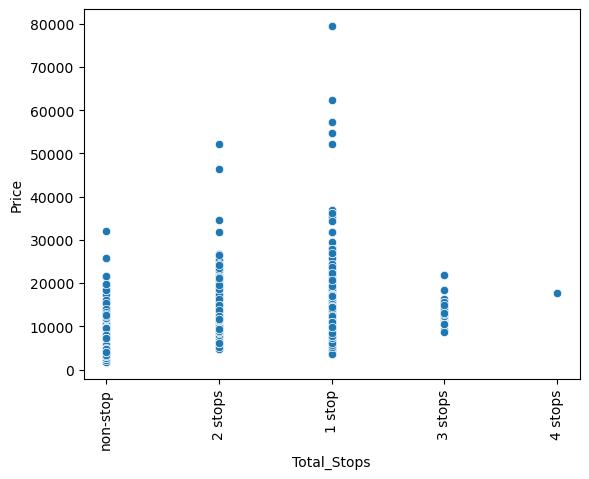

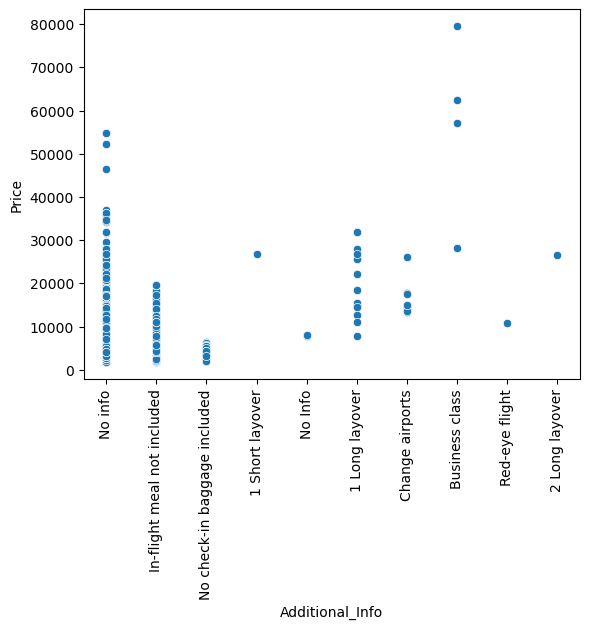

In [46]:
plt.figure(figsize=(10,5))
for i in df_categorical_features:
    sns.scatterplot(x=train_data[i],y=train_data.Price)
    plt.xticks(rotation = 90)
    plt.show()

will try to find the insights from the above plots

1. Jet airways business class has the highest prices between 50k — 80k

2. All the high cost flights depart from bangalore, rest of the flights have prices between 3k — 50k

3. All high cost flights have destination as Delhi, rest of the flights have prices between 3k — 50k

4. The flights with high prices having 1 stop.

5. If a flight is of business class, its price would be high


We have quite less data where prices are higher than 50k. We check these rows once –

In [47]:
train_data[train_data.Price>50000]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins
657,Jet Airways Business,Banglore,New Delhi,1 stop,No info,52229,1,3,2019,5,45,10,45,5,0
1478,Jet Airways,Banglore,New Delhi,1 stop,No info,54826,18,3,2019,18,40,0,45,6,5
2618,Jet Airways,Banglore,New Delhi,1 stop,No info,54826,18,3,2019,22,50,5,5,6,15
2924,Jet Airways Business,Banglore,New Delhi,1 stop,Business class,79512,1,3,2019,5,45,11,25,5,40
5372,Jet Airways Business,Banglore,New Delhi,1 stop,Business class,62427,1,3,2019,5,45,12,25,6,40
5439,Jet Airways,Banglore,New Delhi,1 stop,No info,54826,1,3,2019,16,55,23,0,6,5
9715,Jet Airways Business,Delhi,Cochin,2 stops,No info,52285,6,3,2019,20,5,4,25,8,20
10364,Jet Airways Business,Banglore,New Delhi,1 stop,Business class,57209,1,3,2019,9,45,14,25,4,40


We make the below observations –

- We observe that the flights with high prices are 8 in number.

- Majority of the flights belong to Business class

- All the flights have Airlines as Jet airways Business.

- All of these flights took flight in March

In [48]:
# As total stops is a Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [49]:
# More than 80 % of data in additional info is no info so we are dropping it

train_data.drop([ "Additional_Info"], axis = 1, inplace = True)

In [50]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0.0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2.0,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2.0,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1.0,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1.0,13302,1,3,2019,16,50,21,35,4,45


#### 5.Treating Missing Values

In [51]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins
9039,Air India,Delhi,Cochin,NaN,7480,6,5,2019,9,45,9,25,23,40


In [52]:
# Filtering data with missing value and filling up with appropriate values as determined
train_data.loc[(train_data.Airline=='Air India')&(train_data.Source=='Delhi') & (train_data.Destination=='Cochin') & (train_data.Price==7480) & ((train_data['Month'])==5) & ((train_data['Duration_hours'])==23) & ((train_data['Duration_mins'])==40)]

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins
1616,Air India,Delhi,Cochin,1.0,7480,24,5,2019,9,45,9,25,23,40
2554,Air India,Delhi,Cochin,1.0,7480,15,5,2019,9,45,9,25,23,40
9039,Air India,Delhi,Cochin,NaN,7480,6,5,2019,9,45,9,25,23,40


In [53]:
# So we can see that most of the data tells that the total_stops = 1 with same info, So i am replacing the null values with 1

train_data.loc[train_data.Total_Stops.isnull(),'Total_Stops'] = 1

In [54]:
train_data.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Price              0
Date               0
Month              0
Year               0
Dep_hour           0
Dep_minutes        0
Arrival_hour       0
Arrival_minutes    0
Duration_hours     0
Duration_mins      0
dtype: int64

In [55]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10463 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10463 non-null  object 
 1   Source           10463 non-null  object 
 2   Destination      10463 non-null  object 
 3   Total_Stops      10463 non-null  float64
 4   Price            10463 non-null  int64  
 5   Date             10463 non-null  int32  
 6   Month            10463 non-null  int32  
 7   Year             10463 non-null  int32  
 8   Dep_hour         10463 non-null  int32  
 9   Dep_minutes      10463 non-null  int32  
 10  Arrival_hour     10463 non-null  int32  
 11  Arrival_minutes  10463 non-null  int32  
 12  Duration_hours   10463 non-null  int64  
 13  Duration_mins    10463 non-null  int64  
dtypes: float64(1), int32(7), int64(3), object(3)
memory usage: 1.2+ MB


#### 6.Checking the relation of ‘Price’ column with numerical data

In [56]:
# Checking numeric variables
df_numeric_features = train_data.select_dtypes(exclude=object)
df_numeric_features.columns

Index(['Total_Stops', 'Price', 'Date', 'Month', 'Year', 'Dep_hour',
       'Dep_minutes', 'Arrival_hour', 'Arrival_minutes', 'Duration_hours',
       'Duration_mins'],
      dtype='object')

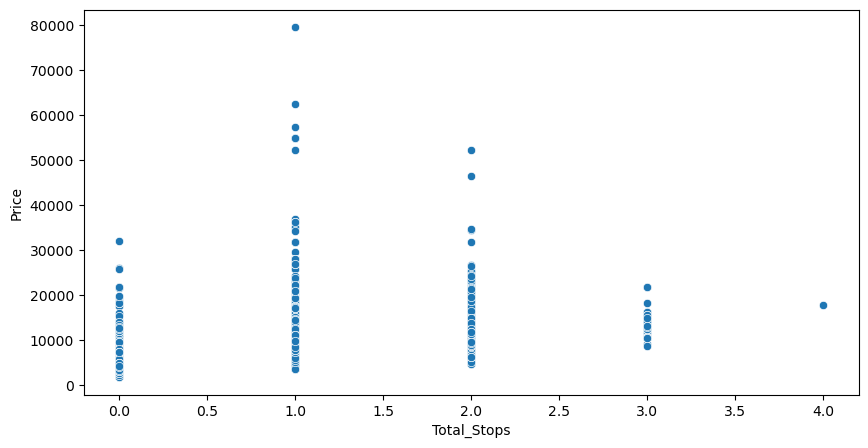

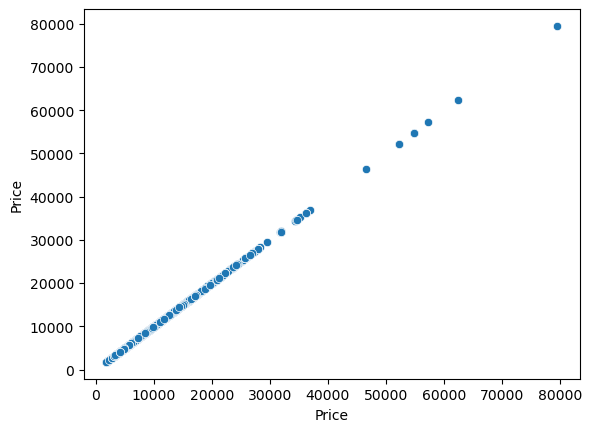

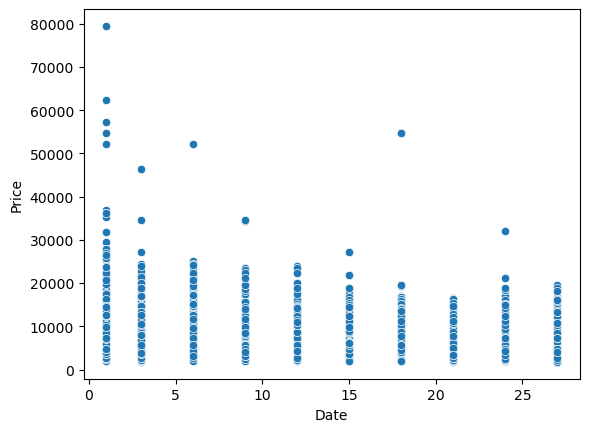

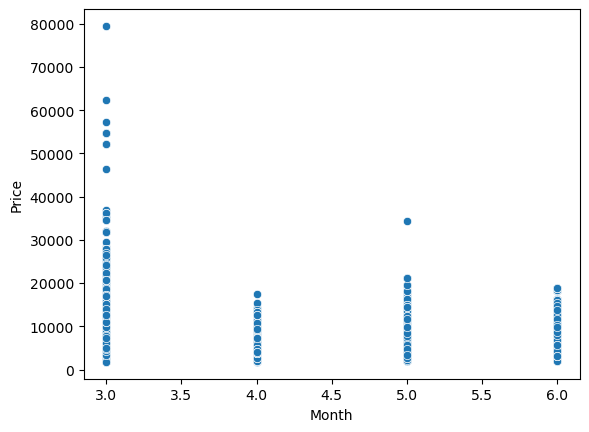

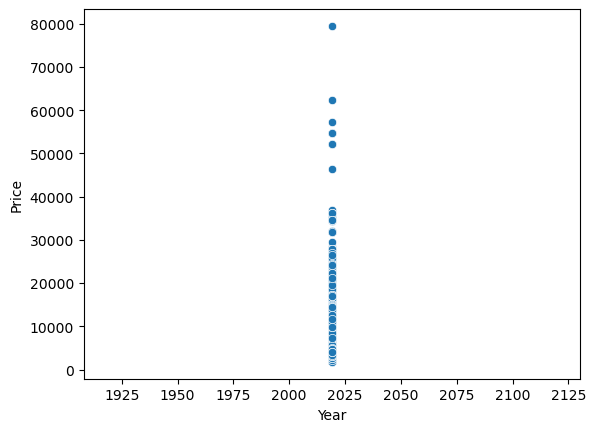

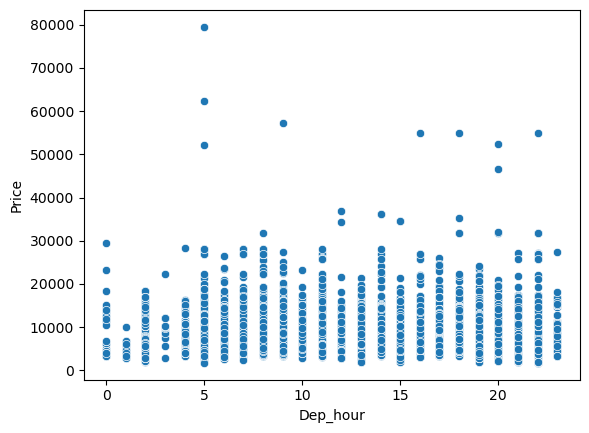

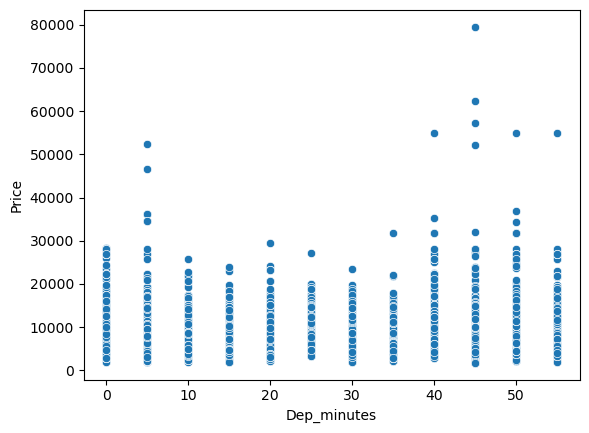

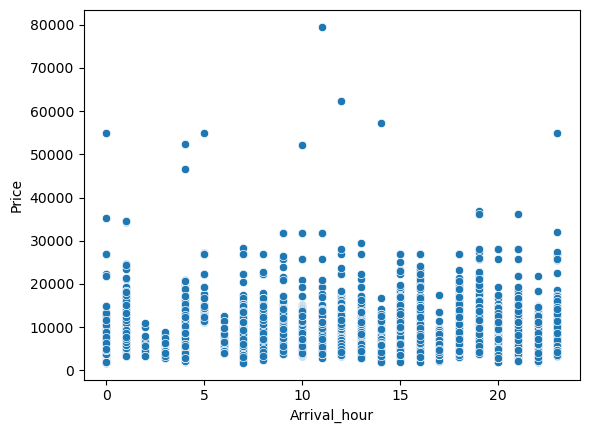

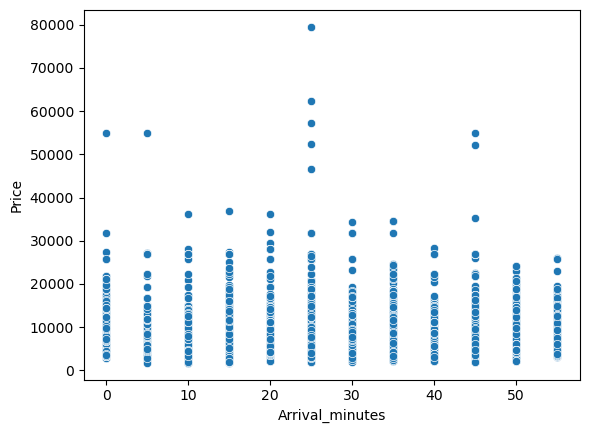

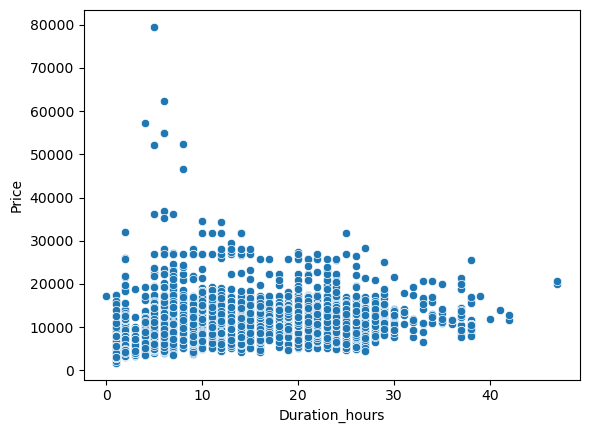

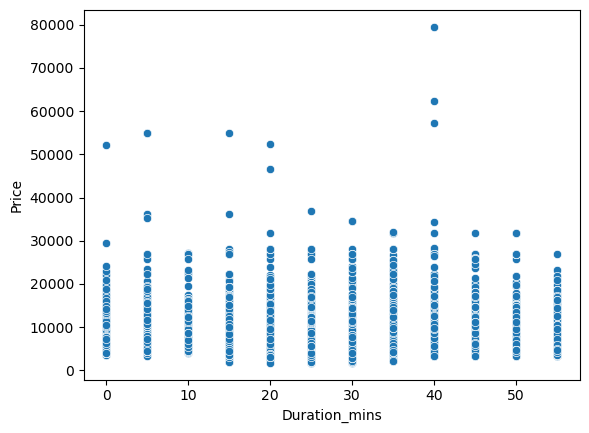

In [57]:
plt.figure(figsize=(10,5))
for i in df_numeric_features.columns:
    sns.scatterplot(x=train_data[i],y=train_data.Price)
    plt.show()

We observe that –

- As number of stops increase, the price range gets decreasing into a smaller price window (10k — 22k)

- High price flights are lesser during end of month

- Prices are higher in the month of March

- Prices are high if flight is departing in the morning and evening.

- Prices are high if arrival time is in the afternoon 

- With increase in travel hours, price decreases

- Most Flight depart during morning hours

- Most Flight arrive in the evening hours

Total_Stops


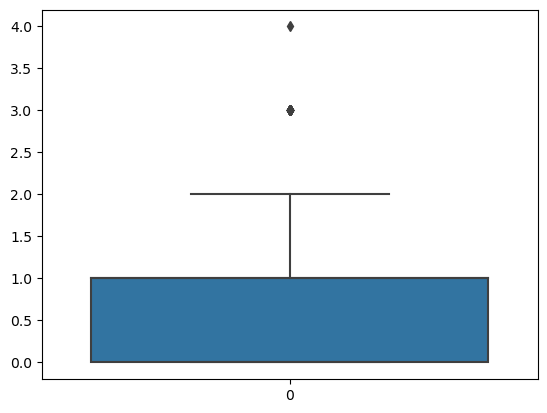

Price


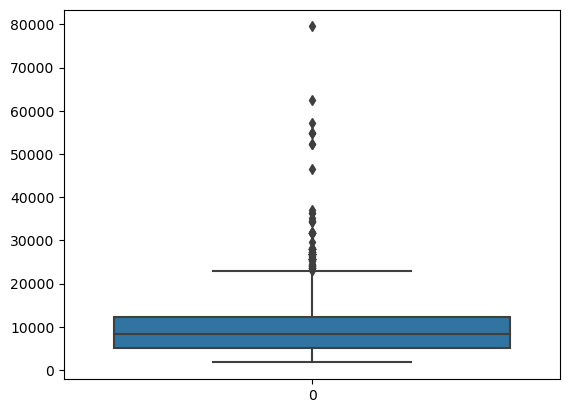

Date


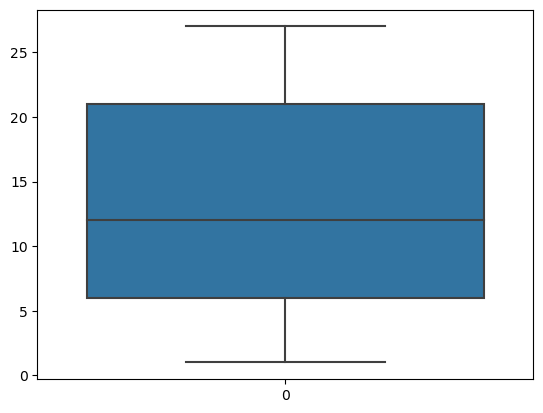

Month


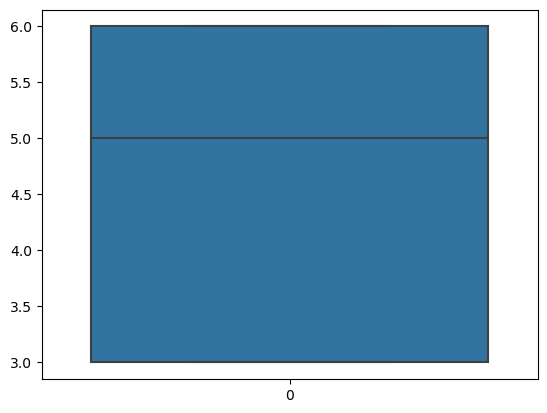

Year


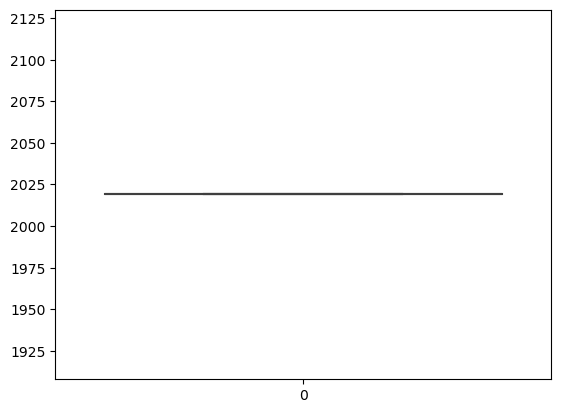

Dep_hour


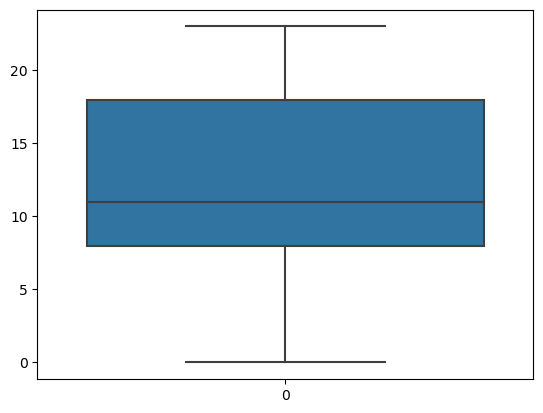

Dep_minutes


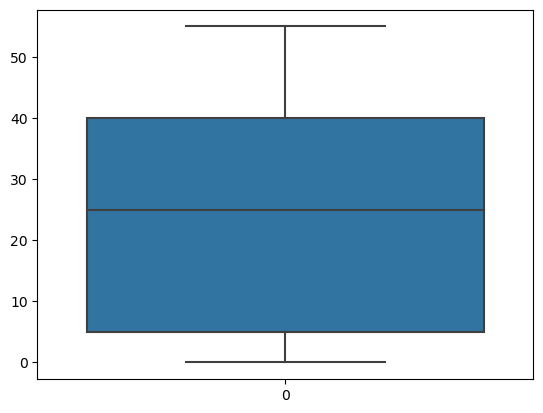

Arrival_hour


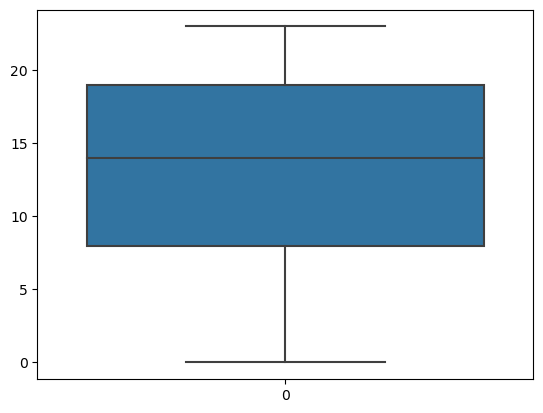

Arrival_minutes


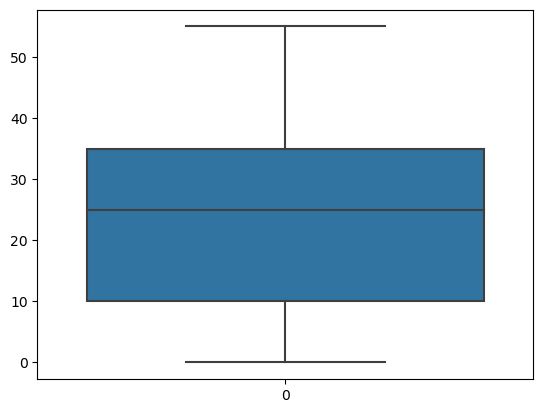

Duration_hours


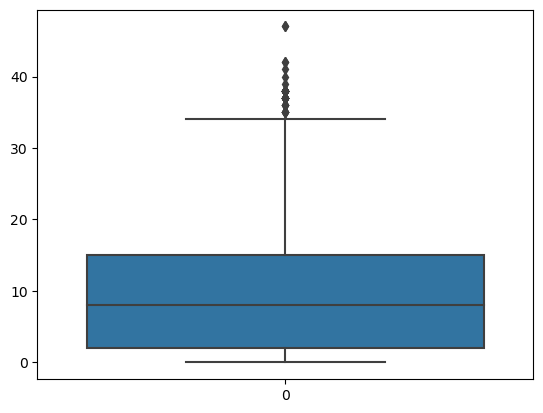

Duration_mins


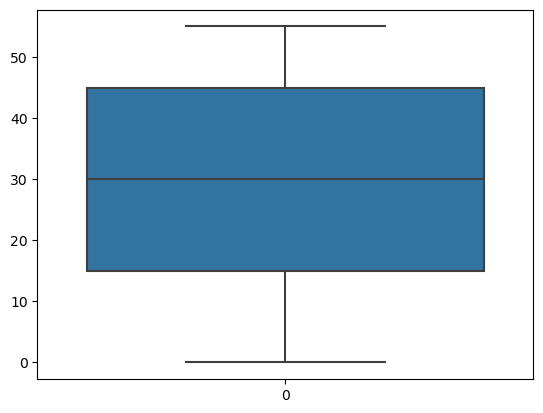

In [58]:
for i in df_numeric_features.columns:
    print(i)
    sns.boxplot(df_numeric_features[i])
    plt.show()

In [59]:
train_data.describe()

,Total_Stops,Price,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins
count,10463.000000,10463.000000,10463.000000,10463.00000,10463.0,10463.000000,10463.000000,10463.000000,10463.000000,10463.000000,10463.000000
mean,0.802351,9026.642454,13.462487,4.70152,2019.0,12.478161,24.406958,13.387269,24.719966,10.027430,28.211316
std,0.660580,4624.653227,8.467403,1.16375,0.0,5.727055,18.815897,6.855353,16.569658,8.378582,16.878771
min,0.000000,1759.000000,1.000000,3.00000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5224.000000,6.000000,3.00000,2019.0,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,1.000000,8266.000000,12.000000,5.00000,2019.0,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,1.000000,12343.500000,21.000000,6.00000,2019.0,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,4.000000,79512.000000,27.000000,6.00000,2019.0,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


In [60]:
train_data[(train_data['Duration_hours']<1) & (train_data['Duration_mins']<15)]

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins
6474,Air India,Mumbai,Hyderabad,2.0,17327,6,3,2019,16,50,16,55,0,5


The data signifies that the flight time is ‘5m’, which is obviously wrong as the plane cannot fly from mumbai to hyderabad with 2 stops in 5 min. So we are dropping this row.

In [61]:
train_data.drop(index=6474,inplace=True,axis=0)

#### Dummy Encoding for rest of categorical columns

In [70]:
train_data.head(2)

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0.0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2.0,7662,1,5,2019,5,50,13,15,7,25


The rest 3 object columns are nominal columns so we are applying one hot encoding so as to convert it into number column

In [71]:
# Before Performing encoding will backup the data into data_train_copy1
train_data_copy1 = train_data.copy(deep=True)

In [74]:
train_data=pd.get_dummies(train_data,drop_first=True).astype(int)

In [75]:
train_data.shape

(10462, 31)

In [76]:
train_data.head(2)

,Total_Stops,Price,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,2019,22,20,1,10,2,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,2019,5,50,13,15,7,...,0,0,0,1,0,0,0,0,0,0


#### Train data is fully cleaned up will perform the same cleaning for test data

Now will perform the same preprocessing steps for test data as we performed for train

In [62]:
# Preprocessing as in train data


print(test_data.info())
print()

#treating null values
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Datey"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data["Year"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_minutes"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_minutes"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())


print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())


print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())


# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

data_test=pd.get_dummies(test_data,drop_first=True)

print("Shape of test data : ", data_test.shape)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64
Airline
-------------------------------------------------------------------------

In [63]:
data_test.head()

,Total_Stops,Datey,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,6,17,30,4,25,10,55,...,False,False,True,False,False,True,False,False,False,False
1,1,12,5,5,6,20,10,20,4,0,...,False,False,False,True,False,False,False,False,False,False
2,1,21,5,5,19,15,19,0,23,45,...,False,False,True,False,False,True,False,False,False,False
3,1,21,5,5,8,0,21,0,13,0,...,False,False,True,False,False,True,False,False,False,False
4,0,24,6,6,23,55,2,45,2,50,...,False,False,False,False,False,False,True,False,False,False


In [64]:
print(train_data.shape,data_test.shape)

(10462, 14) (2671, 29)


In [65]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                2671 non-null   int64
 1   Datey                                      2671 non-null   int32
 2   Month                                      2671 non-null   int32
 3   Year                                       2671 non-null   int32
 4   Dep_hour                                   2671 non-null   int32
 5   Dep_minutes                                2671 non-null   int32
 6   Arrival_hour                               2671 non-null   int32
 7   Arrival_minutes                            2671 non-null   int32
 8   Duration_hours                             2671 non-null   int64
 9   Duration_mins                              2671 non-null   int64
 10  Airline_Air India                          2671 

In [66]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10462 non-null  object 
 1   Source           10462 non-null  object 
 2   Destination      10462 non-null  object 
 3   Total_Stops      10462 non-null  float64
 4   Price            10462 non-null  int64  
 5   Date             10462 non-null  int32  
 6   Month            10462 non-null  int32  
 7   Year             10462 non-null  int32  
 8   Dep_hour         10462 non-null  int32  
 9   Dep_minutes      10462 non-null  int32  
 10  Arrival_hour     10462 non-null  int32  
 11  Arrival_minutes  10462 non-null  int32  
 12  Duration_hours   10462 non-null  int64  
 13  Duration_mins    10462 non-null  int64  
dtypes: float64(1), int32(7), int64(3), object(3)
memory usage: 939.9+ KB


### 4. Feature Selection

In [78]:
X=train_data.drop(['Price'],axis=1)
X.head()

,Total_Stops,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,2019,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,2019,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,2019,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,2019,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,2019,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [79]:
y = train_data['Price']
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int32

### Random Forest Importance - Performing feature selection technique

Feature Importances:
Total_Stops: 0.03174768155494197
Date: 0.14035120141181798
Month: 0.05364523268511061
Year: 0.0
Dep_hour: 0.026728179800902887
Dep_minutes: 0.022117942857360462
Arrival_hour: 0.03372592933952945
Arrival_minutes: 0.01982485456375346
Duration_hours: 0.4401601678547921
Duration_mins: 0.01763438892781408
Airline_Air India: 0.005275331729283861
Airline_GoAir: 0.0011167106189342551
Airline_IndiGo: 0.006692444566530093
Airline_Jet Airways: 0.06328034269340296
Airline_Jet Airways Business: 0.06859759172851375
Airline_Multiple carriers: 0.01982835591159035
Airline_Multiple carriers Premium economy: 0.0008404446701717326
Airline_SpiceJet: 0.0027077025518164573
Airline_Trujet: 3.5100189969106787e-06
Airline_Vistara: 0.0031390644247810684
Airline_Vistara Premium economy: 4.305888652101965e-05
Source_Chennai: 0.0004825500947276515
Source_Delhi: 0.002710358905192653
Source_Kolkata: 0.0030843900885957416
Source_Mumbai: 0.0035550222205734737
Destination_Cochin: 0.00250491218177379

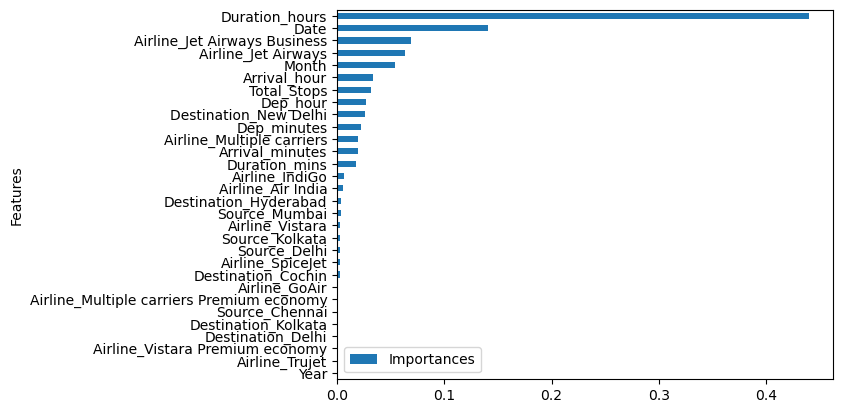

In [80]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the data
rf.fit(X, y)

# Get the feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Print the feature importances
print("Feature Importances:")
for feature, importance in zip(feature_names, importances):
    print(f"{feature}: {importance}")

# Creating a dataframe for visualization
final_df = pd.DataFrame({'Features':feature_names,"Importances":importances})
final_df.set_index('Features',inplace=True)
sorted_importances = final_df.sort_values(by = 'Importances')
sorted_importances.plot(kind='barh')
plt.show()

In [85]:
sorted_importances.sort_values(by ='Importances', ascending=False)

,Importances
Features,
Duration_hours,0.440160
Date,0.140351
Airline_Jet Airways Business,0.068598
Airline_Jet Airways,0.063280
Month,0.053645
Arrival_hour,0.033726
Total_Stops,0.031748
Dep_hour,0.026728
Destination_New Delhi,0.025884


In [93]:
sorted_importances[sorted_importances.values>=0.017634]

,Importances
Features,
Duration_mins,0.017634
Arrival_minutes,0.019825
Airline_Multiple carriers,0.019828
Dep_minutes,0.022118
Destination_New Delhi,0.025884
Dep_hour,0.026728
Total_Stops,0.031748
Arrival_hour,0.033726
Month,0.053645


### Now will extract Top 13 features for building my Model

In [96]:
new_X = X[sorted_importances[sorted_importances.values>=0.017634].index]

### 5. Model Building

#### 1.Splitting the data into train and test data set

In [98]:
X_train,X_test,y_train,y_test=train_test_split(new_X,y,test_size=0.20,random_state=1)

In [99]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8369, 13), (2093, 13), (8369,), (2093,))

#### 2.Scaling the data

In [100]:
sc=StandardScaler()

X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

#### 3.Model Application

### Now will try to build with various model like linear regression, Decision Tree, Randomforest etc

In [102]:
models=[LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor()]

In [103]:

for i in range(3):
    models[i].fit(X_train_scaled,y_train)
    
    print(f'{models[i]}: ')
    y_pred_train=models[i].predict(X_train_scaled)
    y_pred_test=models[i].predict(X_test_scaled)
    
    print('MSE_train: ',mean_squared_error(y_train,y_pred_train))
    print('MSE_test: ',mean_squared_error(y_test,y_pred_test))
    
    print('RMSE_train: ',np.sqrt(mean_squared_error(y_train,y_pred_train)))
    print('RMSE_test: ',np.sqrt(mean_squared_error(y_test,y_pred_test)))
    
    print('R2_score_train: ',r2_score(y_train,y_pred_train))
    print('R2_score_test: ',r2_score(y_test,y_pred_test))
    
    print()
    print('--'*55)

LinearRegression(): 
MSE_train:  8479783.901479164
MSE_test:  8377329.096161335
RMSE_train:  2912.0068512074563
RMSE_test:  2894.361604250812
R2_score_train:  0.6042140664758084
R2_score_test:  0.6048937603646564

--------------------------------------------------------------------------------------------------------------
DecisionTreeRegressor(): 
MSE_train:  676787.2369398972
MSE_test:  6646594.692153209
RMSE_train:  822.6707949963321
RMSE_test:  2578.0990462263485
R2_score_train:  0.968411592620563
R2_score_test:  0.6865216819045312

--------------------------------------------------------------------------------------------------------------
RandomForestRegressor(): 
MSE_train:  1045962.3714267093
MSE_test:  4479771.576880793
RMSE_train:  1022.7230179411771
RMSE_test:  2116.5470882739164
R2_score_train:  0.9511806906383445
R2_score_test:  0.7887171815921965

--------------------------------------------------------------------------------------------------------------


#### Random Forest had the best accuracy based on training and test dataset but it is overfitted so we need to perfrom some hyper parameter tuning technique

### Randomized Search CV

In [107]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = list(range(100,1300,100))
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [108]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [109]:
from sklearn.model_selection import RandomizedSearchCV

rf_regressor=RandomForestRegressor()
rf_model=RandomizedSearchCV(estimator=rf_regressor,param_distributions=random_grid,
                            cv=3,random_state=0)
rf_model.fit(X_train_scaled,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=0)

In [110]:
# best parameter
rf_model.best_params_

{'n_estimators': 900,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 30}

In [111]:
final_model = RandomForestRegressor(n_estimators = 900,min_samples_split = 10,min_samples_leaf = 2,max_features = 'sqrt',max_depth = 30)
final_model.fit(X_train_scaled,y_train)

RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=10, n_estimators=900)

In [112]:
#predicting the values
trian_pred=final_model.predict(X_train_scaled)
test_pred=final_model.predict(X_test_scaled)

print('R2 score of training dataset',r2_score(y_train,trian_pred))
print('R2 score of testing dataset',r2_score(y_test,test_pred))

R2 score of training dataset 0.8738591138936246
R2 score of testing dataset 0.7911810926546181


In [114]:
from sklearn.metrics import mean_absolute_error
print('r2 score train', r2_score)
print('r2_score test:',r2_score(y_test,test_pred))
print('MAE:', mean_absolute_error(y_test, test_pred))
print('MSE:', mean_squared_error(y_test, test_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, test_pred)))

r2 score train <function r2_score at 0x00000297AC48EA20>
r2_score test: 0.7911810926546181
MAE: 1320.5924265307774
MSE: 4427529.947255737
RMSE: 2104.169657431581


After hypertuning,the accuracy of random forest increases .

## Grid Search CV

In [119]:
# Now will perform RandomForest Classifier

param_grid = { 
    'n_estimators': list(range(100,1300,100)),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
}

In [120]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rfr=RandomForestRegressor()
CV_rfr = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfr.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800, 900, 1000, 1100, 1200]})

In [121]:
CV_rfr.best_params_

{'max_depth': 8, 'max_features': 'log2', 'n_estimators': 700}

In [123]:
final_model_G = RandomForestRegressor(max_depth = 8,max_features = 'log2',n_estimators =700)
final_model_G.fit(X_train_scaled,y_train)

RandomForestRegressor(max_depth=8, max_features='log2', n_estimators=700)

In [124]:
#predicting the values
trian_pred=final_model_G.predict(X_train_scaled)
test_pred=final_model_G.predict(X_test_scaled)

print('R2 score of training dataset',r2_score(y_train,trian_pred))
print('R2 score of testing dataset',r2_score(y_test,test_pred))

R2 score of training dataset 0.7982372026601923
R2 score of testing dataset 0.7446600158806029


In [125]:
from sklearn.metrics import mean_absolute_error
print('r2 score train', r2_score)
print('r2_score test:',r2_score(y_test,test_pred))
print('MAE:', mean_absolute_error(y_test, test_pred))
print('MSE:', mean_squared_error(y_test, test_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, test_pred)))

r2 score train <function r2_score at 0x00000297AC48EA20>
r2_score test: 0.7446600158806029
MAE: 1630.8641317820425
MSE: 5413903.5626241
RMSE: 2326.779654936002


### Steps invloved while Model Building

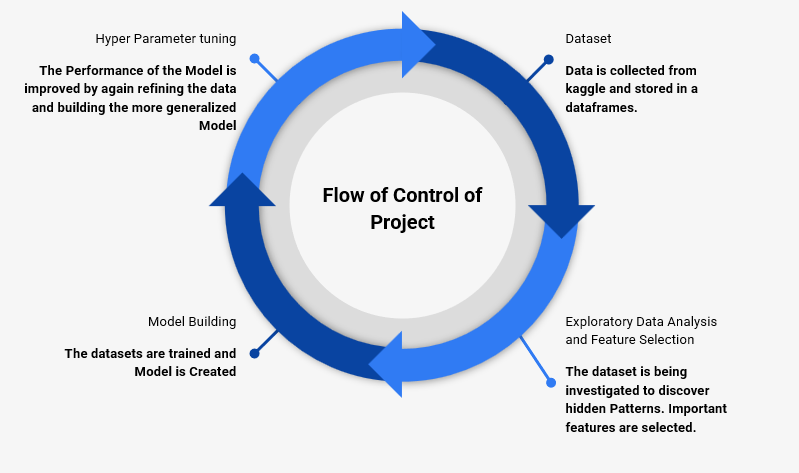

In [130]:
new_X.columns

Index(['Duration_mins', 'Arrival_minutes', 'Airline_Multiple carriers',
       'Dep_minutes', 'Destination_New Delhi', 'Dep_hour', 'Total_Stops',
       'Arrival_hour', 'Month', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Date', 'Duration_hours'],
      dtype='object')

In [127]:
X_train_scaled

array([[-0.78762949, -0.27993347, -0.35826496, ..., -0.02444995,
         1.58797937, -0.96056601],
       [ 1.28113388, -1.48119651, -0.35826496, ..., -0.02444995,
        -0.53341033, -0.96056601],
       [ 0.09898339,  0.32069805,  2.79123026, ..., -0.02444995,
        -0.53341033,  0.59711982],
       ...,
       [ 1.28113388,  0.6210138 , -0.35826496, ..., -0.02444995,
        -1.24054023, -0.96056601],
       [ 0.09898339,  1.22164532, -0.35826496, ..., -0.02444995,
         1.58797937, -1.080388  ],
       [ 0.39452101,  1.82227684, -0.35826496, ..., -0.02444995,
        -1.4762502 , -0.96056601]])

In [134]:
list(new_X.columns)

['Duration_mins',
 'Arrival_minutes',
 'Airline_Multiple carriers',
 'Dep_minutes',
 'Destination_New Delhi',
 'Dep_hour',
 'Total_Stops',
 'Arrival_hour',
 'Month',
 'Airline_Jet Airways',
 'Airline_Jet Airways Business',
 'Date',
 'Duration_hours']

In [137]:
new_X.head()

,Duration_mins,Arrival_minutes,Airline_Multiple carriers,Dep_minutes,Destination_New Delhi,Dep_hour,Total_Stops,Arrival_hour,Month,Airline_Jet Airways,Airline_Jet Airways Business,Date,Duration_hours
0,50,10,0,20,1,22,0,1,3,0,0,24,2
1,25,15,0,50,0,5,2,13,5,0,0,1,7
2,0,25,0,25,0,9,2,4,6,1,0,9,19
3,25,30,0,5,0,18,1,23,5,0,0,12,5
4,45,35,0,50,1,16,1,21,3,0,0,1,4


In [136]:
data_test.columns

Index(['Total_Stops', 'Datey', 'Month', 'Year', 'Dep_hour', 'Dep_minutes',
       'Arrival_hour', 'Arrival_minutes', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [147]:
new_test_data = data_test.rename(columns = {'Datey':'Date'})

In [149]:
final_test = new_test_data[list(new_X.columns)]

In [151]:
final_test_scaled = sc.transform(final_test)

In [154]:
final_test['predicted_price'] = final_model_G.predict(final_test_scaled)

In [155]:
final_test

,Duration_mins,Arrival_minutes,Airline_Multiple carriers,Dep_minutes,Destination_New Delhi,Dep_hour,Total_Stops,Arrival_hour,Month,Airline_Jet Airways,Airline_Jet Airways Business,Date,Duration_hours,predicted_price
0,55,25,False,30,False,17,1,4,6,True,False,6,10,11819.216237
1,0,20,False,20,False,6,1,10,5,False,False,12,4,5884.055379
2,45,0,False,15,False,19,1,19,5,True,False,21,23,12409.079565
3,0,0,True,0,False,8,1,21,5,False,False,21,13,10420.484841
4,50,45,False,55,False,23,0,2,6,False,False,24,2,4459.577232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,55,25,False,30,False,20,1,20,6,False,False,6,23,9065.572968
2667,35,55,False,20,False,14,0,16,3,False,False,27,2,5034.450675
2668,35,25,False,50,False,21,1,4,3,True,False,6,6,14507.021361
2669,15,15,False,0,False,4,1,19,3,False,False,6,15,12193.242367
